## EX1

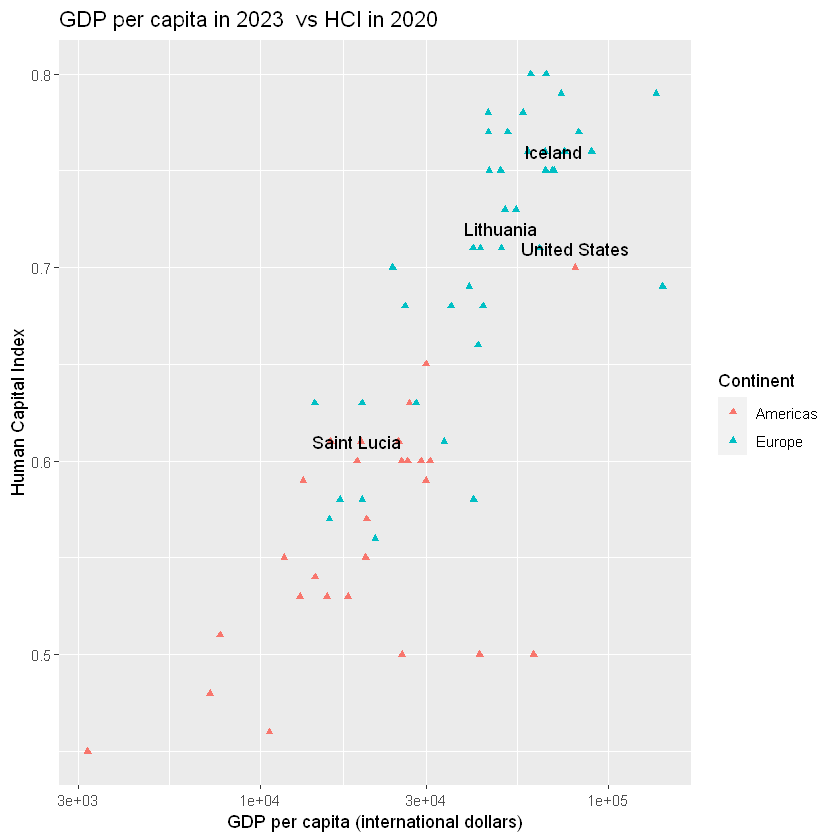

In [1]:
library(ggplot2)
theme_set(theme_gray())

dados <- read.csv("Data/Paises_PIB_ICH.csv")
continentes <- c("Europe", "Americas")
gdp_ano <- 2023
hci_ano <- 2020

dados |>
  subset(Continent %in% continentes) |>
  ggplot() +
  geom_point(aes( x = GDP, y = HCI, color = Continent), shape = 17) +
  geom_text(data = subset(dados, Country %in% c("Lithuania","Iceland","United States","Saint Lucia")), 
    aes(x = GDP, y = HCI, label = Country), nudge_y = 0.01) + 
  scale_x_log10() +
  labs(title = paste("GDP per capita in", gdp_ano, " vs HCI in", hci_ano),
       x = "GDP per capita (international dollars)",
       y = "Human Capital Index")

## EX2

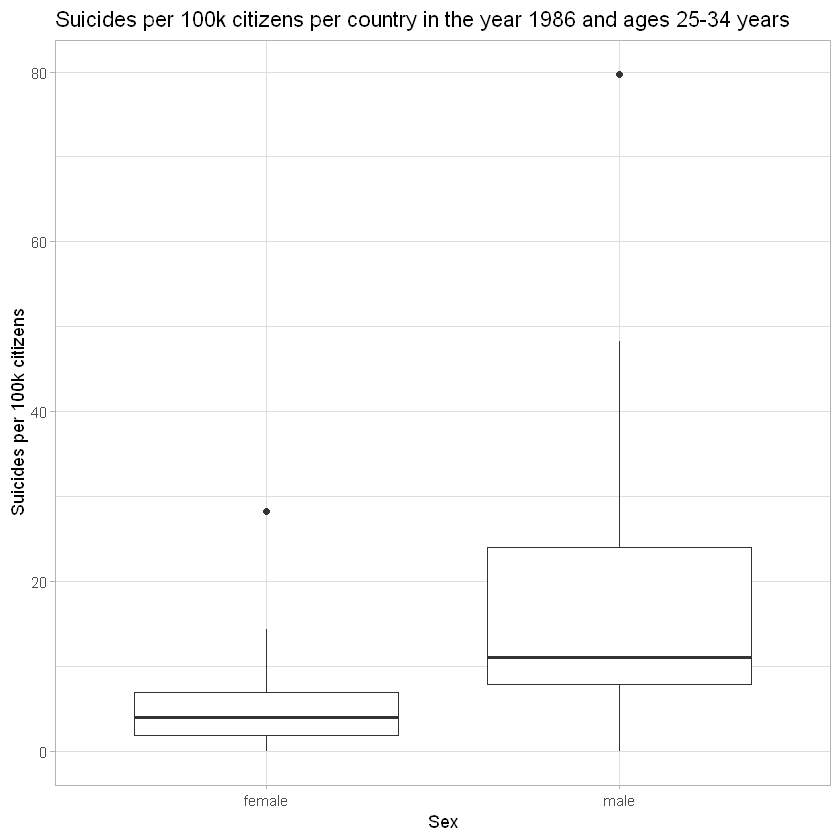

In [67]:
library(ggplot2)
theme_set(theme_light())

dados <- read.csv("Data/master.csv")
ano <- 1986
grupo_etario <- "25-34 years"

subset(dados, year == ano & age == grupo_etario) |>
  ggplot() + 
  geom_boxplot(aes( x = sex, y = suicides.100k.pop)) +
  labs(title = paste("Suicides per 100k citizens per country in the year", ano, "and ages", grupo_etario),
  y = "Suicides per 100k citizens", x="Sex")


# EX3

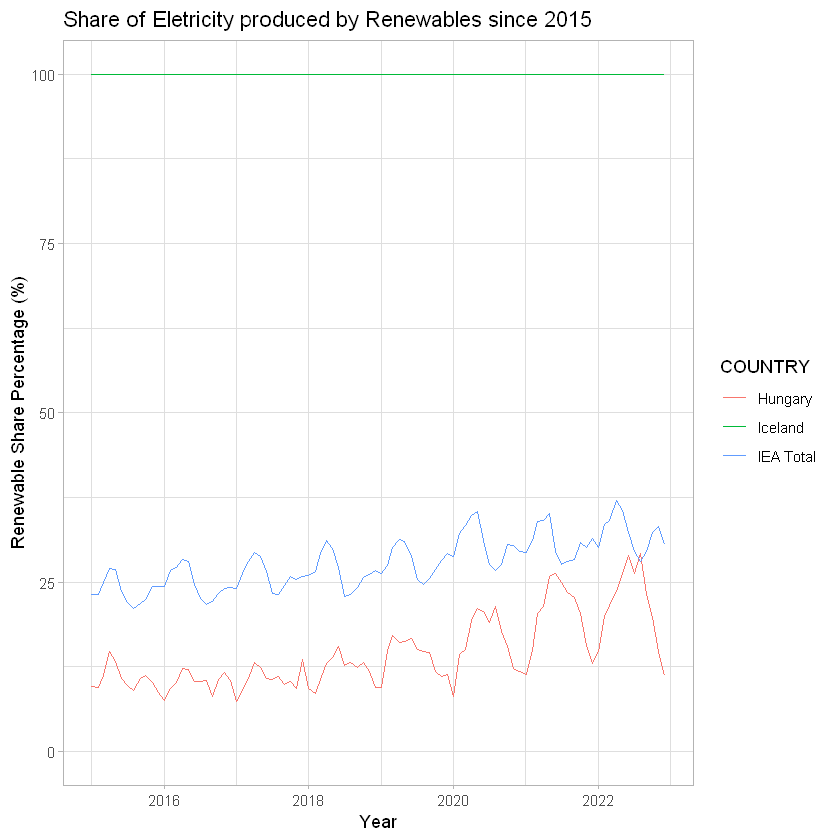

In [4]:
library(ggplot2)
library(readxl)
theme_set(theme_light())


dados <- readxl::read_excel("Data/electricity.xlsx", col_types = "text")
dados$YEAR <- as.numeric(dados$YEAR)
dados$MONTH <- as.numeric(dados$MONTH)
dados$share <- as.numeric(dados$share) * 100

start_year <- 2015
countries <- c("IEA Total","Hungary","Iceland")
type_of_eletricity <- "Renewables"

dados_filtered <- subset(dados, YEAR >= start_year & COUNTRY %in% countries & PRODUCT == type_of_eletricity)
dados_filtered$TIME <- as.Date(paste(dados_filtered$YEAR, sprintf("%02d", dados_filtered$MONTH), "01", sep = "-"))

ggplot(data = dados_filtered, aes(x = TIME, y = share, color=COUNTRY,group=COUNTRY)) +
  geom_line() +
  coord_cartesian(ylim = c(0,100)) + 
  labs(x = "Year", y = "Renewable Share Percentage (%)", title = paste("Share of Eletricity produced by Renewables since 2015"))
  
  
  


## EX4

In [60]:
set.seed(2336)

n <- 650
p <- 45
n_circuits <- 7

signals_mapping <- 1:9
signal_probabilities <- signals_mapping / p


n_system_sound_not_off <- 0
n_system_off <- 0

for (i in 1:n){
    simulation <- sample(signals_mapping, size = n_circuits, prob = signal_probabilities, replace = TRUE)
    if(2 %in% simulation & !(1 %in% simulation)){
        n_system_sound_not_off <- n_system_sound_not_off + 1
    }
    else if(1 %in% simulation){
        n_system_off <- n_system_off + 1
    }
}

answer <- round(n_system_sound_not_off / (n-n_system_off), digits = 2)
answer


[1] 0.29

## EX5

In [24]:
square <- function(a){
    a*a
}

set.seed(1950)

n <- 23
r <- 300
m <- 170

p <- pt(1.5, df=n)

t_proportions <- vector(length = r)

for (i in 1:r){

    less_than_val_count <- 0

    for(j in 1:m){
        z_values <- rnorm(n+1)

        #values_sum <- lapply(z_values[2:r], FUN = square)
        #plot( x = values_sum, y = 2:r)
        #print(values_sum)

        t_value <- sqrt(n) * (z_values[1] / sqrt(sum(unlist(lapply(z_values[2:(n+1)], FUN = square)))))

        if(t_value <= 1.5){
            less_than_val_count <- less_than_val_count + 1
        }
    }

    t_proportions[i] <- less_than_val_count / m 
    #print(t_proportions[i])
}
t_proportions_average <- mean(t_proportions)

solution <- abs(t_proportions_average - p) * 100
solution <- round(solution,digits = 5)
solution



[1] 0.06266

In [26]:
# Check Square function working
square <- function(a){
    a*a
}

n <- 3
z_values = list(1,2,3,4)

t_value <- sum(unlist(lapply(z_values[2:(n+1)], FUN = square)))
t_value

[1] 29

## EX6 

In [14]:
n_var <- 30
a <- 4
y_bigger_than <- 90


# Valor Simulado
set.seed(1948)

sample_amount <- 1000
n <- 30
lambda0 <- 1 / a

y_checks <- 0

for (i in 1:sample_amount){
    eletronic_components <- rexp(n,rate = lambda0)
    y <- sum(eletronic_components)
    if( y > y_bigger_than){
        y_checks <- y_checks + 1
    }
}

y_proportion_simulation <- y_checks / sample_amount

# Valor Exato
shape_exact <- 30
rate_exact <- 0.25

y_exact <- 1 - pgamma(90, shape = shape_exact, rate = rate_exact)

print(y_proportion_simulation)
print(y_exact)


# Comparison
solution <- round(abs(y_proportion_simulation - y_exact) * 100, digits = 4)
solution

[1] 0.914
[1] 0.9252581


[1] 1.1258

## EX6 (usando código da solução)

In [15]:
seed <- 1948
n <- 30
a <- 4
valor <- 90

set.seed(seed)
y <- vector(length = 1000)

for (i in 1:1000) {
  y[i] <- sum(rexp(n, rate = 1 / a))
}
sim <- sum(y > valor) / 1000

ext <- 1 - pgamma(valor, n, rate = 1 / a)

solution <- abs(sim - ext) * 100
solution

[1] 1.125814

## EX7

In [8]:
a <- 4
n <- 11
x <- c(4.37, 4.3, 5.15, 5.11, 5.15, 4.66, 6.15, 5.72, 5.87, 5.64, 4.05)

## 1
library(stats4)

# Como mle só funciona para neg-log-verossimilhança
# Temos de usar -ln(L(Px)), ou seja, a função negativa logaritmica de verossimmilhança ao valor theta

negLogLikelihood <- function(theta) {
  if (theta <= 0) {
    return(Inf)
  }
  
  log_likelihood <- sum(log(theta) + theta * log(a) + (-theta - 1) * log(x))

  # Retornar o valor negativo da log-verossimilhança (já que estamos minimizando)
  if (is.finite(log_likelihood)) {
    return(-log_likelihood)
  } else {
    return(Inf)
  }
}


fit <- mle(negLogLikelihood, start = list(theta = 3.6))
#summary(fit)
theta_hat <- coef(fit)


## 2

## Nota: Quantil 0.75 é equivalente a F^-1(0.75)
## Como f.d.p = 0x^(-0-1)a^(0) <-> pareto_distribution
## então F^-1: x = a * (1-p)^(-1/0)

p <- 0.75
Q_hat <- a * (1 / (1 - p))^(1 / theta_hat)


## 3
theta_true <- 3.6
Q_true <- a * (1 / (1 - p))^(1 / theta_true)

solution <- round(abs(Q_hat - Q_true), digits = 4)
solution


theta 
0.3341519

## EX7 (usando código da solução)

In [6]:
data <- c(4.37, 4.3, 5.15, 5.11, 5.15, 4.66, 6.15, 5.72, 5.87, 5.64, 4.05)
valor_inicial <- 3.6
p <- 0.75
theta <- 3.6
a <- 4

library(stats4)

soma_logdata <- sum(log(data))
n <- length(data)

fun <- function(theta) {
  res <- -n * log(theta) + (theta + 1) * soma_logdata - n * theta * log(a)
  return(res)
}

result <- mle(minuslog = fun, start = list(theta = valor_inicial))
est_theta <- as.vector(result@coef)

quantil <- function(p, theta) {
  res <- a * (1 - p)^(-1 / theta)
}

estimativa <- quantil(p, est_theta)
valor_exato <- quantil(p, theta)

solution <- abs(estimativa - valor_exato)
solution

[1] 0.334152

## EX8

In [2]:
## 1
set.seed(1820)
n <- 8
travagens <- c(34.0,39.5,33.2,38.1,29.9,37.4,32.1,36.5,31.4,34.1,33.1,31.5,33.9,33.9)
observacoes <- sample(travagens,size = n,replace = FALSE)

## 2
observacoes_media <- mean(observacoes)
observacoes_variancia <- var(observacoes)

gamma_var <- 0.95
df_distribuicao <- n - 1

quantil_inferior <- qchisq((1 - gamma_var)/2, df = df_distribuicao)
quantil_superior <- qchisq((1 + gamma_var)/2, df = df_distribuicao)

IC_observacao <- (n-1) * observacoes_variancia/ c(quantil_superior,quantil_inferior)

#print(observacoes)
#print(quantil_inferior)
#print(quantil_superior)
#print(IC_observacao)

## 3
library(pracma)

f <- function(x) {
  c_arg <- x[1]
  d_arg <- x[2]
  eq1 <- pchisq(d_arg, df = n - 1) - pchisq(c_arg, df = n - 1) - gamma_var
  eq2 <- dchisq(d_arg, df = n + 3) - dchisq(c_arg, df = n + 3)
  return(c(eq1, eq2))
}

sol_inicial <- c(quantil_inferior,quantil_superior)
sol <- fsolve(f, sol_inicial)


c_enunc <- sol$x[1]
d_enunc <- sol$x[2]


IC_novo <- (n-1) * observacoes_variancia/ c(d_enunc,c_enunc)

print(IC_novo)
print(IC_observacao)

## 4
diferenca <- round(diff(IC_observacao) - diff(IC_novo), digits = 3)
diferenca

[1]  2.521553 27.941185
[1]  3.746933 35.504967


[1] 6.338

## EX9

## EX10

In [3]:
a <- 4.5
b <- 13
n <- 140
dados <- c(6.52, 5.48, 7.01, 7.07, 9.76, 7.45, 10.11, 8.78, 8.53, 7.14, 8.56, 8.22, 8.11, 8.72, 9.89, 12.01, 9.14, 7.26, 11.05, 12.14, 8.44, 10.98, 6.95, 11.37, 8.65, 11.03, 10.55, 8.77, 10.04, 9.70, 9.43, 8.91, 10.79, 12.38, 7.41, 10.80, 8.40, 8.16, 9.22, 11.29, 8.54, 12.57, 8.53, 9.12, 8.53, 8.62, 12.03, 7.64, 11.13, 7.18, 8.16, 9.29, 6.89, 10.45, 11.20, 9.38, 8.79, 4.71, 9.35, 10.80, 10.90, 9.86, 9.50, 8.17, 11.19, 7.89, 8.72, 8.74, 8.87, 8.63, 9.28, 6.58, 10.74, 8.12, 6.92, 6.89, 5.19, 10.73, 10.38, 8.74, 8.96, 8.60, 4.92, 7.48, 8.96, 10.96, 8.08, 7.15, 8.82, 5.69, 8.09, 10.21, 5.80, 9.76, 11.90, 8.73, 7.10, 11.13, 5.07, 9.43, 8.04, 10.76, 7.95, 9.06, 9.39, 7.70, 5.92, 9.32, 10.53, 10.26, 6.31, 6.34, 5.36, 7.75, 7.74, 8.42, 10.76, 11.39, 8.42, 9.79, 9.45, 9.17, 7.91, 5.79, 5.70, 8.74, 10.33, 11.00, 6.17, 9.11, 9.57, 11.82, 10.35, 8.37, 6.66, 6.97, 9.66, 12.18, 10.80, 11.14)
k <- 6

amplitude <- (b-a)/6

classes_var <- seq(a,b,by = amplitude)

frequencias_observadas <- table(cut(dados, breaks = classes_var))
print(frequencias_observadas)


# Função de distribuição cumulativa (CDF) para a distribuição triangular simétrica
CDF_triangular <- function(x, a, b) {
  ifelse(x < a, 0,
         ifelse(x < (a + b) / 2, 2*((x - a)^2) / ((b - a) * (b - a)),
                ifelse(x < b, 1 - 2*((b - x)^2) / ((b - a) * (b - a)),
                       1)))
}

# Calcule as frequências esperadas para cada classe
frequencias_esperadas <- numeric(length(classes_var) - 1)
for (i in 1:(length(classes_var) - 1)) {
  frequencias_esperadas[i] <- length(dados) * (CDF_triangular(classes_var[i + 1], a, b) - CDF_triangular(classes_var[i], a, b))
}
print(frequencias_esperadas)

qui_quadrado <- sum((frequencias_observadas - frequencias_esperadas)^2 / frequencias_esperadas)

print(qui_quadrado)

# Graus de liberdade
graus_liberdade <- k - 1

# Calcule o valor-p
valor_p <- round(1 - pchisq(qui_quadrado, df = graus_liberdade), digits = 4)
valor_p


 (4.5,5.92] (5.92,7.33] (7.33,8.75] (8.75,10.2] (10.2,11.6]   (11.6,13] 
         10          19          39          34          30           8 
[1]  7.777778 23.333333 38.888889 38.888889 23.333333  7.777778
[1] 3.965714


[1] 0.5544